# Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [73]:
#2 Charger le dataset en utilisant pandas
dataset=pd.read_csv("iris.csv")
dataset.head()
# pd.clipboard()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


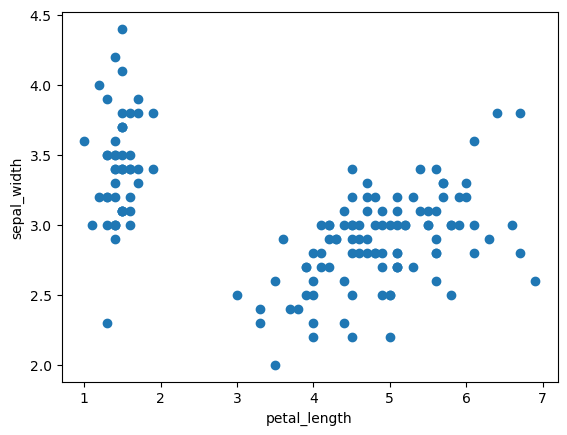

In [74]:
plt.plot(dataset["petal_length"],dataset["sepal_width"],'o')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.show()

# normalisation

In [65]:

# df = data[['petal_length', 'sepal_width']]
# df = (df - df.mean()) / df.std()
# df

### prédiction de la largeur du sépale en fonction de la longueur de pétale

In [75]:
x = dataset['petal_length'].values.reshape(-1, 1)
y = dataset['sepal_width'].values.reshape(-1, 1)

In [1]:
x.shape[0]

NameError: name 'x' is not defined

In [80]:
y.shape

(150, 1)

## Create polynomial features

In [121]:
X=np.hstack((x**2,x,np.ones((x.shape[0], 1))))

print(X.shape)

#display our matrix 
print("******"*4)
print(X[:10])

(150, 3)
************************
[[1.96 1.4  1.  ]
 [1.96 1.4  1.  ]
 [1.69 1.3  1.  ]
 [2.25 1.5  1.  ]
 [1.96 1.4  1.  ]
 [2.89 1.7  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]]


In [83]:
# par autre facon
# Création de la matrice X, inclut le Biais

X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(150, 3)
[[1.96 1.4  1.  ]
 [1.96 1.4  1.  ]
 [1.69 1.3  1.  ]
 [2.25 1.5  1.  ]
 [1.96 1.4  1.  ]
 [2.89 1.7  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]]


## Generate parameters thata

In [90]:
np.random.seed(0) # pour fixé les valeurs des thetas
theta = np.random.random((X.shape[1], 1))
print('Theta : ', theta)


Theta :  [[0.5488135 ]
 [0.71518937]
 [0.60276338]]


In [113]:
theta.shape

(3, 1)

In [115]:
X.shape

(150, 3)

In [130]:
print("theta",theta.shape)
print("features",X.shape)

theta (3, 1)
features (150, 3)


# Polynomial model

In [100]:
def model(X, theta):
    return X.dot(theta)

# Cost function

In [101]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# Gradient descent

In [102]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [103]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    mse_list = []  # cost_history.shape = (n_iterations, )
    
    m = X.shape[0]

    for i in range(0, n_iterations):
        
        y_pred = model(X, theta)  # y_pred.shape = (m, 1)
        
        dtheta=grad(X, y, theta)

        theta = theta - learning_rate * dtheta  # mise a jour du parametre theta (formule du gradient descent)
        
        mse_list.append(cost_function(X, y, theta)) # on enregistre la valeur du Cout au tour i dans cost_list y[i]
        
    return theta,   mse_list 

## Training the model

In [104]:
n_iterations = 30000
learning_rate = 0.004

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

print(f"Iteration {1:3d}: {cost_history[0]}")

for i in range(len(cost_history)):
    if (i+1) % 5000 == 0:
        print(f"Iteration {i:3d}: {cost_history[i]}")

Iteration   1: 64.34334087342953
Iteration 4999: 0.12184471390537241
Iteration 9999: 0.0763315455543998
Iteration 14999: 0.06343738090198235
Iteration 19999: 0.059784383580382065
Iteration 24999: 0.058749466639941475
Iteration 29999: 0.05845626821155001


In [108]:
theta_final

array([[ 0.07923589],
       [-0.6579016 ],
       [ 4.16013432]])

## Learning Curve

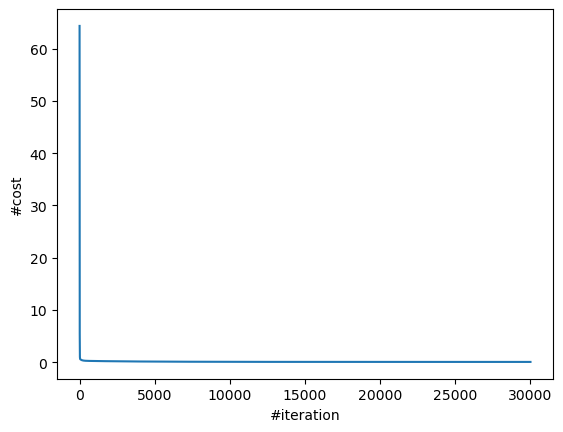

In [132]:
plt.plot(range(0, n_iterations), cost_history )

plt.xlabel('#iteration')
plt.ylabel('#cost')
plt.show()

## Plot trained model

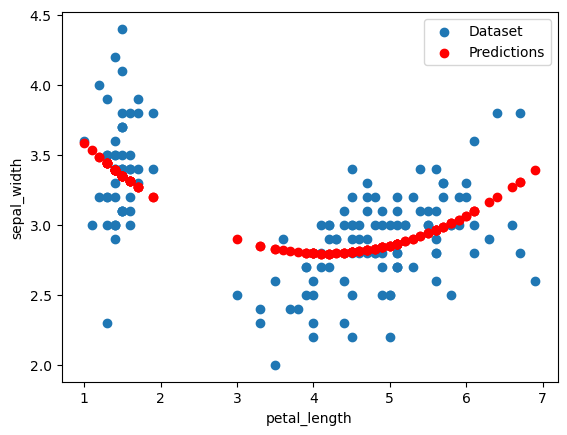

In [128]:
predictions = model(X, theta_final) 

plt.scatter(X[:, 1], y[:, 0], label='Dataset')
plt.scatter(X[:, 1], predictions[:, 0], c = 'r', label = 'Predictions')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


## Performance du model

In [111]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [112]:
coef_determination(y[:, 0], predictions[:, 0])

0.37396455654009264